<div class='alert alert-block alert-info'><h2>Financial Crisis in Africa</h2> </div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import os
!pip install plotly

In [2]:
df=pd.read_csv('/content/african_crises.csv')
df

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


#**Revisión y Limpieza**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [4]:
df.shape

(1059, 14)

In [5]:
df.isnull().sum()

,0
case,0
cc3,0
country,0
year,0
systemic_crisis,0
exch_usd,0
domestic_debt_in_default,0
sovereign_external_debt_default,0
gdp_weighted_default,0
inflation_annual_cpi,0


In [6]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1054,False
1055,False
1056,False
1057,False


In [7]:
df[df.duplicated()]

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis


In [8]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [9]:
df.shape

(1059, 14)

In [10]:
df = df.drop(["case", "cc3"], axis=1)

In [11]:
df.shape

(1059, 12)

In [12]:
df['banking_crisis'] = df['banking_crisis'].map({'crisis': 1, 'no_crisis': 0})
df

,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1
1,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,0
2,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,0
3,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,0
4,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1054,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,1
1055,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,0
1056,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,0
1057,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,0


In [13]:
df.describe()

,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000,1059.000000
mean,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367,0.088763
std,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765,0.284536
min,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000,0.000000
25%,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000,0.000000
50%,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000,0.000000
75%,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000,0.000000
max,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000,1.000000


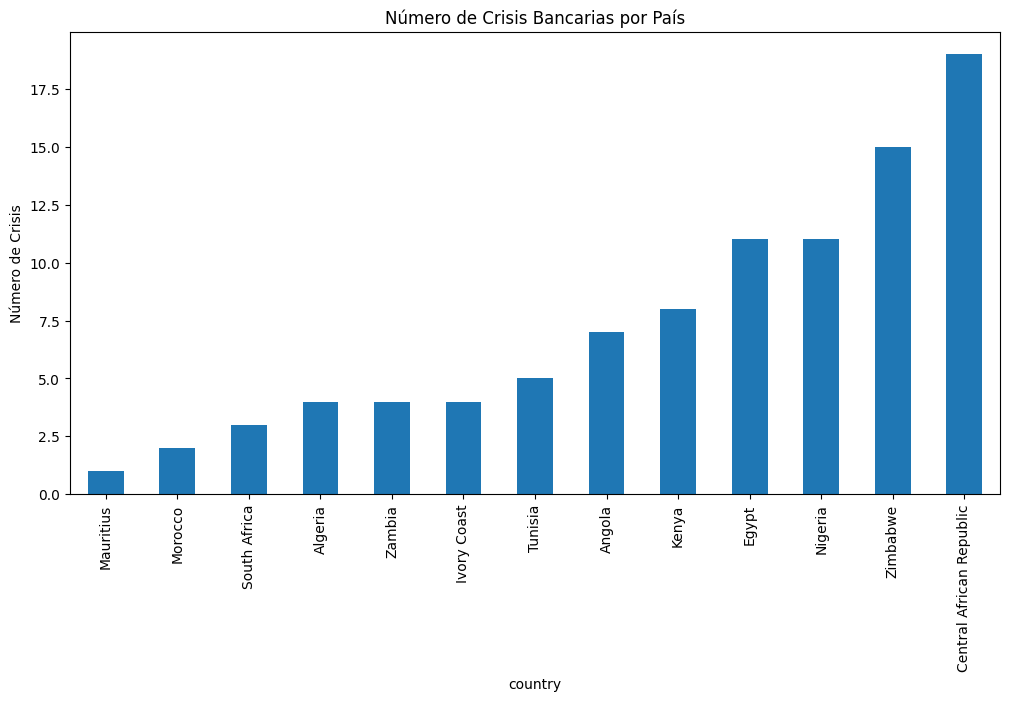

In [14]:
country_crisis = df.groupby('country')['banking_crisis'].sum().sort_values()
country_crisis.plot(kind='bar', figsize=(12,6))
plt.title('Número de Crisis Bancarias por País')
plt.ylabel('Número de Crisis')
plt.show()

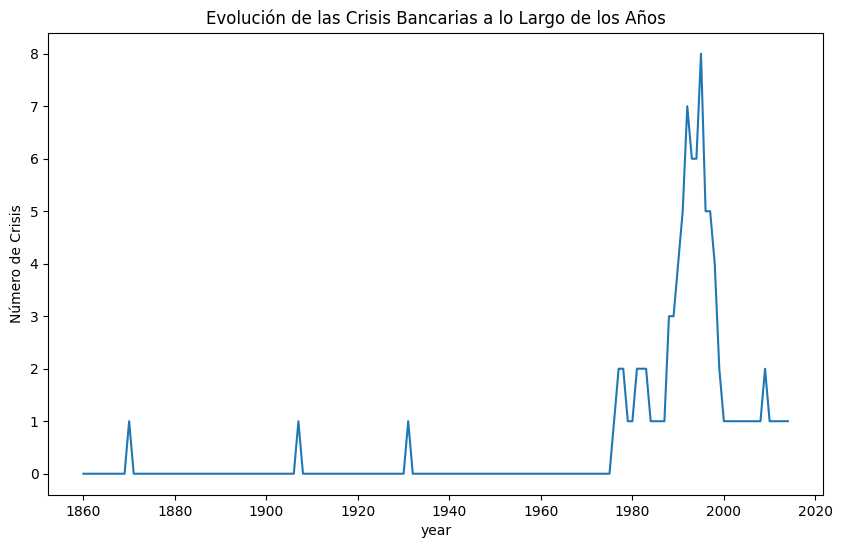

In [15]:
crisis_por_ano = df.groupby('year')['banking_crisis'].sum()
crisis_por_ano.plot(kind='line', figsize=(10,6))
plt.title('Evolución de las Crisis Bancarias a lo Largo de los Años')
plt.ylabel('Número de Crisis')
plt.show()


#**Comprobar si mis columnas siguen una distribucion Gaussiana**


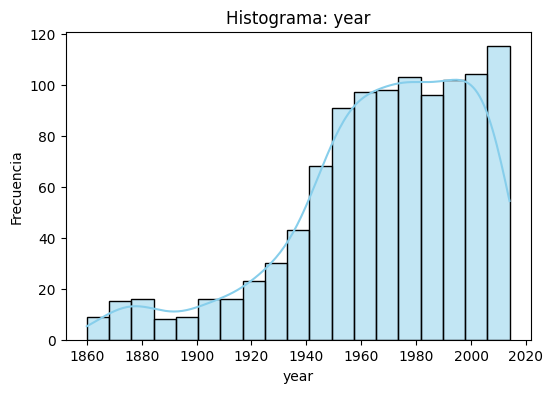

year -> Estadístico de Shapiro: 0.9281, p-valor: 0.0000
  → No es distribución normal (se rechaza H0)



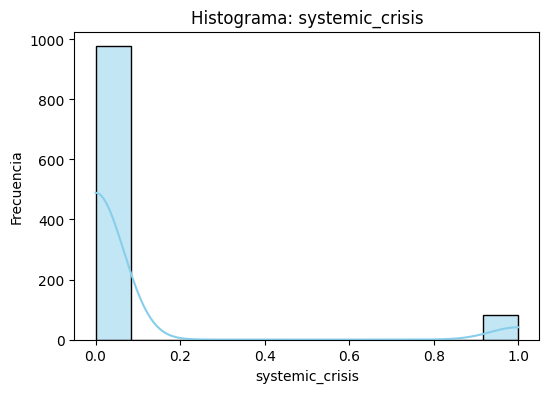

systemic_crisis -> Estadístico de Shapiro: 0.2943, p-valor: 0.0000
  → No es distribución normal (se rechaza H0)



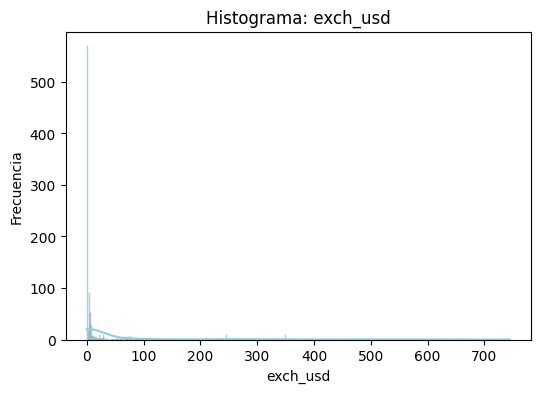

exch_usd -> Estadístico de Shapiro: 0.4453, p-valor: 0.0000
  → No es distribución normal (se rechaza H0)



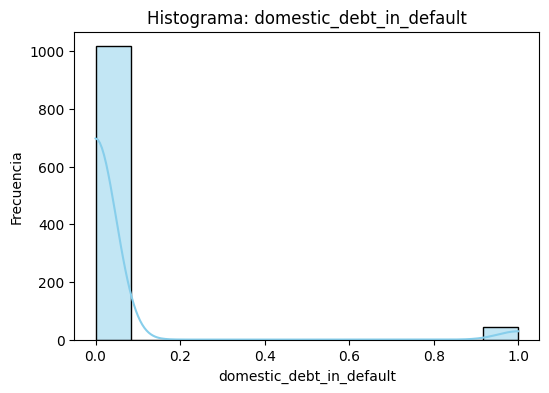

domestic_debt_in_default -> Estadístico de Shapiro: 0.1922, p-valor: 0.0000
  → No es distribución normal (se rechaza H0)



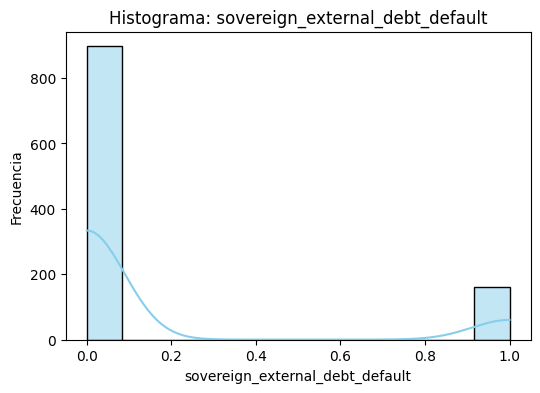

sovereign_external_debt_default -> Estadístico de Shapiro: 0.4305, p-valor: 0.0000
  → No es distribución normal (se rechaza H0)



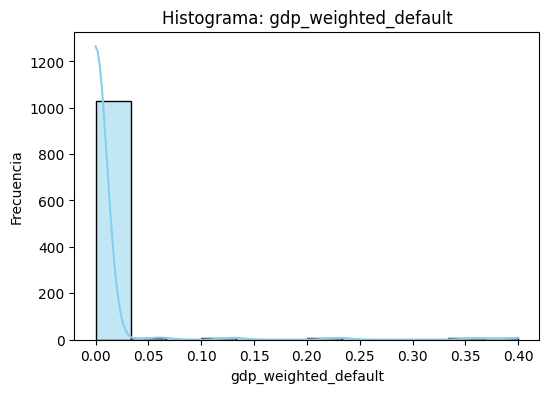

gdp_weighted_default -> Estadístico de Shapiro: 0.1312, p-valor: 0.0000
  → No es distribución normal (se rechaza H0)



In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Seleccionar solo las columnas numéricas (sin la variable objetivo)
numericas = df.select_dtypes(include=['int64', 'float64']).drop(columns=['banking_crisis'])

# Histograma y test de normalidad
for col in numericas.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histograma: {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

    # Test de Shapiro-Wilk
    stat, p = shapiro(df[col])
    print(f"{col} -> Estadístico de Shapiro: {stat:.4f}, p-valor: {p:.4f}")
    if p > 0.05:
        print("  → Parece distribución normal (no se rechaza H0)\n")
    else:
        print("  → No es distribución normal (se rechaza H0)\n")


#**Pre-Procesado y Modelos**

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler

# Trabajar sobre una copia del DataFrame original
df_modelo = df.copy()

# Convertir la columna 'country' en variables dummy (una-hot)
df_modelo = pd.get_dummies(df_modelo, columns=['country'], drop_first=True)




In [18]:
# Dividir en características y variable objetivo
x = df_modelo.drop(columns='banking_crisis')
y = df_modelo['banking_crisis']

# Balancear con RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x, y)

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=42)

# Normalizar
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [19]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

def entrenar_evaluar_modelo(nombre_modelo, modelo, X_train, X_test, y_train, y_test):
    print(f"📌 Evaluando modelo: {nombre_modelo}")

    # Entrenamiento
    modelo.fit(X_train, y_train)

    # Predicciones
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else None

    # Métricas
    print("\n✅ Reporte de Clasificación:")
    print(classification_report(y_test, y_pred))

    print("\n📊 Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))

    print("\n🔢 Métricas clave:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    if y_proba is not None:
        print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
    else:
        print("ROC AUC: No disponible para este modelo")


In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
entrenar_evaluar_modelo("Random Forest", rf, X_train, X_test, y_train, y_test)


📌 Evaluando modelo: Random Forest

✅ Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       185
           1       0.99      1.00      1.00       201

    accuracy                           0.99       386
   macro avg       1.00      0.99      0.99       386
weighted avg       0.99      0.99      0.99       386


📊 Matriz de Confusión:
[[183   2]
 [  0 201]]

🔢 Métricas clave:
Accuracy: 0.9948
Precision: 0.9901
Recall: 1.0000
F1 Score: 0.9950
ROC AUC: 1.0000


In [21]:
lr = LogisticRegression(max_iter=1000)
entrenar_evaluar_modelo("Logistic Regression", lr, X_train, X_test, y_train, y_test)

📌 Evaluando modelo: Logistic Regression

✅ Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       185
           1       0.99      0.89      0.94       201

    accuracy                           0.94       386
   macro avg       0.94      0.94      0.94       386
weighted avg       0.94      0.94      0.94       386


📊 Matriz de Confusión:
[[183   2]
 [ 22 179]]

🔢 Métricas clave:
Accuracy: 0.9378
Precision: 0.9890
Recall: 0.8905
F1 Score: 0.9372
ROC AUC: 0.9862


In [22]:
knn = KNeighborsClassifier()
entrenar_evaluar_modelo("K-Nearest Neighbors", knn, X_train, X_test, y_train, y_test)

📌 Evaluando modelo: K-Nearest Neighbors

✅ Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       185
           1       0.96      1.00      0.98       201

    accuracy                           0.98       386
   macro avg       0.98      0.98      0.98       386
weighted avg       0.98      0.98      0.98       386


📊 Matriz de Confusión:
[[177   8]
 [  0 201]]

🔢 Métricas clave:
Accuracy: 0.9793
Precision: 0.9617
Recall: 1.0000
F1 Score: 0.9805
ROC AUC: 0.9969


In [23]:
svm = SVC(probability=True)
entrenar_evaluar_modelo("Support Vector Machine", svm, X_train, X_test, y_train, y_test)

📌 Evaluando modelo: Support Vector Machine

✅ Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       185
           1       0.98      0.90      0.94       201

    accuracy                           0.94       386
   macro avg       0.94      0.94      0.94       386
weighted avg       0.94      0.94      0.94       386


📊 Matriz de Confusión:
[[182   3]
 [ 21 180]]

🔢 Métricas clave:
Accuracy: 0.9378
Precision: 0.9836
Recall: 0.8955
F1 Score: 0.9375
ROC AUC: 0.9865


#**Mejor modelo: RandomForestClassifier / Testeo del modelo**

In [24]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

rf = RandomForestClassifier()
rf.fit(X_train, y_train)


# Predicciones en entrenamiento
y_train_pred = rf.predict(X_train)
y_train_prob = rf.predict_proba(X_train)[:, 1]

# Predicciones en prueba
y_test_pred = rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:, 1]

# Métricas en entrenamiento
print("📘 Entrenamiento:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("ROC AUC:", roc_auc_score(y_train, y_train_prob))
print(classification_report(y_train, y_train_pred))

print("----------------------------------------------------")

# Métricas en prueba (test)
print("📗 Prueba:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("ROC AUC:", roc_auc_score(y_test, y_test_prob))
print(classification_report(y_test, y_test_pred))


📘 Entrenamiento:
Accuracy: 1.0
ROC AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       780
           1       1.00      1.00      1.00       764

    accuracy                           1.00      1544
   macro avg       1.00      1.00      1.00      1544
weighted avg       1.00      1.00      1.00      1544

----------------------------------------------------
📗 Prueba:
Accuracy: 0.9948186528497409
ROC AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       185
           1       0.99      1.00      1.00       201

    accuracy                           0.99       386
   macro avg       1.00      0.99      0.99       386
weighted avg       0.99      0.99      0.99       386



#**Importancia de las variables en el modelo**

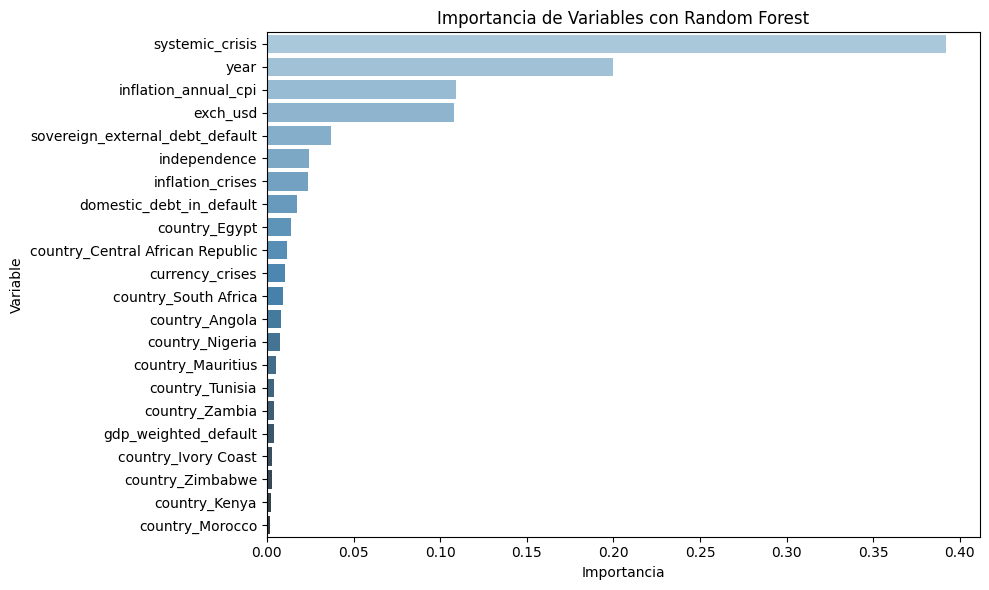

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


# Obtener importancia de variables
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importancias = rf.feature_importances_
importancias_ordenadas = pd.Series(importancias, index=x.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importancias_ordenadas.values, y=importancias_ordenadas.index, palette="Blues_d")
plt.title('Importancia de Variables con Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

#**Usar GridSearch para el RandomForest (optimizacion de modelos)**

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definición del modelo base
rf = RandomForestClassifier(random_state=42)

# Definimos el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 8, 16],
    'min_samples_leaf': [1, 10, 20, 40]

}


In [28]:
# Definimos la búsqueda con validación cruzada
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=2)

# Ejecutamos la búsqueda en los datos de entrenamiento
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 10, 20, 40],
                         'min_samples_split': [2, 4, 8, 16],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [29]:
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Usamos el mejor modelo encontrado
best_model_rf = grid_search.best_estimator_

Mejores parámetros encontrados:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [30]:
print("Mejor puntuación de validación (accuracy):")
print(grid_search.best_score_)


Mejor puntuación de validación (accuracy):
0.9935170007985542


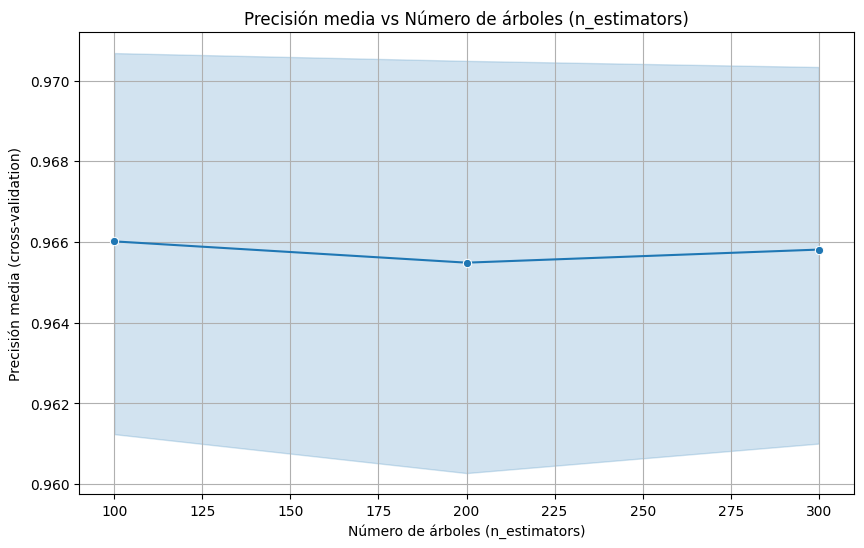

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de tener el DataFrame con los resultados
results_df = pd.DataFrame(grid_search.cv_results_)

# Filtramos para que el gráfico sea más claro (opcional)
plot_data = results_df.copy()
plot_data['param_n_estimators'] = plot_data['param_n_estimators'].astype(int)

# Gráfico de líneas: Accuracy promedio por número de árboles
plt.figure(figsize=(10,6))
sns.lineplot(data=plot_data, x='param_n_estimators', y='mean_test_score', marker='o')
plt.title('Precisión media vs Número de árboles (n_estimators)')
plt.xlabel('Número de árboles (n_estimators)')
plt.ylabel('Precisión media (cross-validation)')
plt.grid(True)
plt.show()

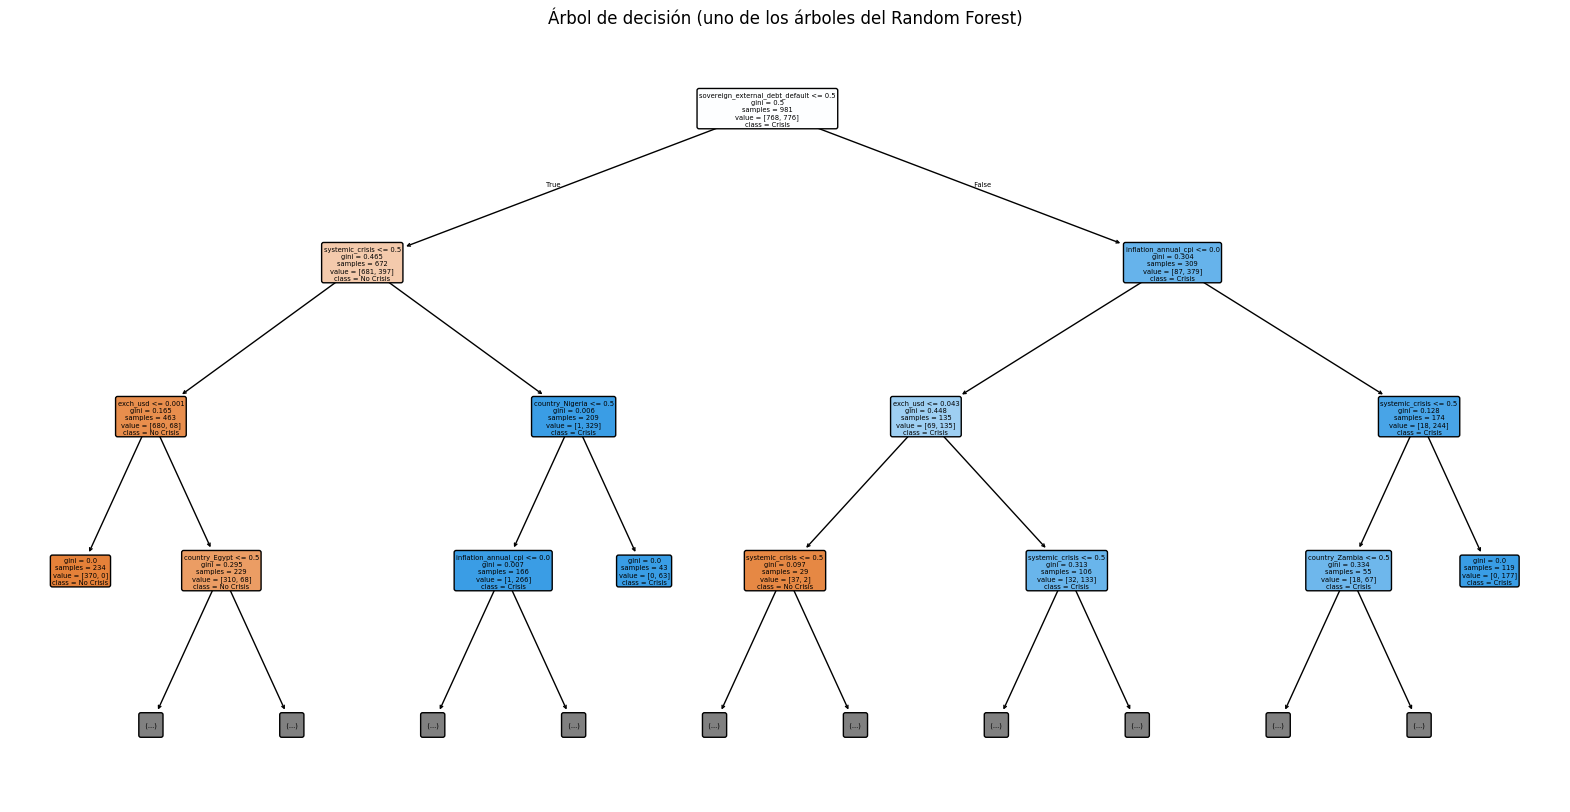

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Árbol individual del Random Forest
estimator = best_model_rf.estimators_[0]

# Usamos los nombres de las columnas originales
feature_names = x.columns  # ← asegúrate de que 'X' sea el DataFrame original

# Visualización
plt.figure(figsize=(20, 10))
plot_tree(estimator,
          feature_names=feature_names,
          class_names=["No Crisis", "Crisis"],
          filled=True,
          rounded=True,
          max_depth=3)
plt.title("Árbol de decisión (uno de los árboles del Random Forest)")
plt.show()

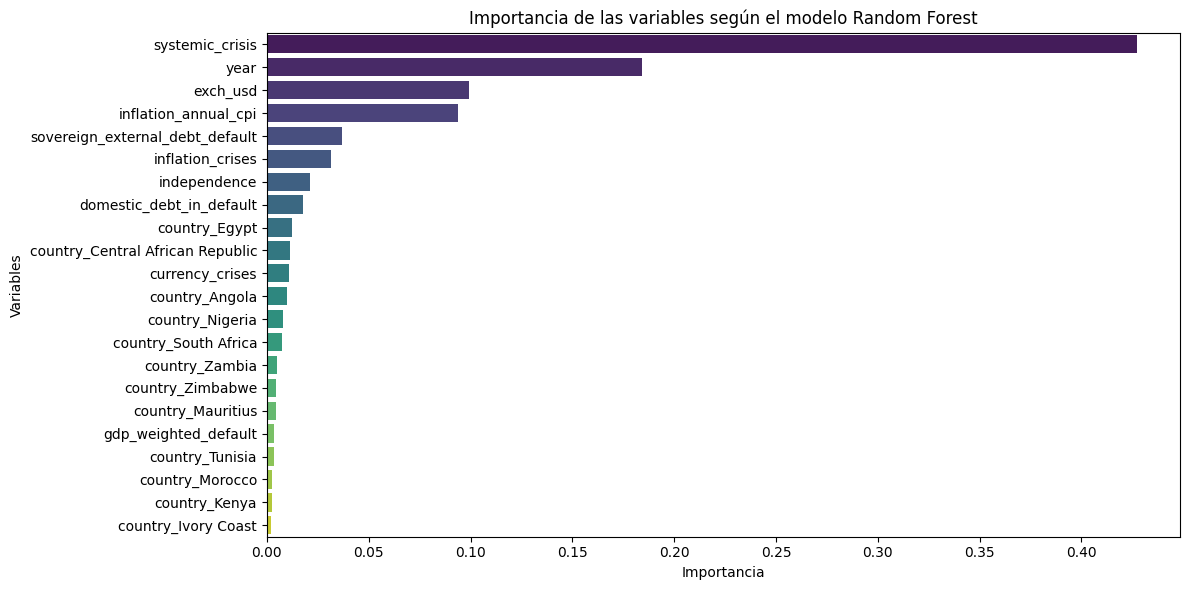

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtenemos las importancias
importances = best_model_rf.feature_importances_
feature_names = x.columns  # 'X' del DataFrame de entrenamiento original

# Creamos un DataFrame ordenado
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Importancia de las variables según el modelo Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()

#Volver a probar el Grid Search con hiperparametros diferentes

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definición del modelo base
modelo_rf = RandomForestClassifier(random_state=42)

# Definimos el grid de hiperparámetros
param_grid_2 = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]

}

In [36]:
# Definimos la búsqueda con validación cruzada
grid_search_2 = GridSearchCV(estimator=modelo_rf,
                           param_grid=param_grid_2,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=2)

# Ejecutamos la búsqueda en los datos de entrenamiento
grid_search_2.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy', verbose=2)

In [37]:
print("Mejores parámetros encontrados:")
print(grid_search_2.best_params_)

# Usamos el mejor modelo encontrado
best_model_rf2 = grid_search_2.best_estimator_

Mejores parámetros encontrados:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [38]:
print("Mejor puntuación de validación (accuracy):")
print(grid_search_2.best_score_)

Mejor puntuación de validación (accuracy):
0.9948114991804312


Comparacion de los dos gridsearch

In [47]:
best_rf_model_2 = grid_search_2.best_estimator_

# Evaluación en el conjunto de prueba
y_pred = best_rf_model_2.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       185
           1       0.99      1.00      1.00       201

    accuracy                           0.99       386
   macro avg       1.00      0.99      0.99       386
weighted avg       0.99      0.99      0.99       386



In [48]:
best_rf_model = grid_search.best_estimator_

# Evaluación en el conjunto de prueba
y_pred = best_rf_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       185
           1       0.99      1.00      1.00       201

    accuracy                           0.99       386
   macro avg       1.00      0.99      0.99       386
weighted avg       0.99      0.99      0.99       386



In [43]:
# Convertimos todos los resultados del GridSearch a un DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Mostramos las 5 mejores combinaciones ordenadas por accuracy
results_df.sort_values(by='mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
56,0.994397,0.019808,0.060176,0.012166,10,1,8,300,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",1.000000,1.000000,1.0,0.983819,0.983766,0.993517,0.007940,1
50,1.085378,0.045931,0.060897,0.015743,10,1,2,300,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",1.000000,1.000000,1.0,0.983819,0.983766,0.993517,0.007940,1
53,1.163090,0.166444,0.051699,0.006085,10,1,4,300,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",1.000000,1.000000,1.0,0.983819,0.983766,0.993517,0.007940,1
55,0.672515,0.008939,0.033996,0.002566,10,1,8,200,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",1.000000,0.996764,1.0,0.983819,0.983766,0.992870,0.007505,4
0,0.734929,0.089893,0.046919,0.014525,None,1,2,100,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.996764,1.000000,1.0,0.980583,0.983766,0.992223,0.008350,5
